# Полносвязные нейронные сети (FCNN)

## Загрузка данных

Классификация

In [2]:
import pandas as pd

cdata = pd.read_csv('D:/PythonWork/Machine learning and big data/data/balanced_diabetes_data.csv', encoding='utf-8', delimiter=',')

X = cdata.drop(columns=['Diabetes_012', 'Unnamed: 0'])
y = cdata['Diabetes_012']

In [3]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,True,True,True,40,True,False,False,False,False,True,...,True,False,5,18,15,True,False,9,4,3
1,False,False,False,25,True,False,False,True,False,False,...,False,True,3,0,0,False,False,7,6,1
2,True,True,True,28,False,False,False,False,True,False,...,True,True,5,30,30,True,False,9,4,8
3,True,False,True,27,False,False,False,True,True,True,...,True,False,2,0,0,False,False,11,3,6
4,True,True,True,24,False,False,False,True,True,True,...,True,False,2,3,0,False,False,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622537,True,True,True,33,False,False,False,True,True,True,...,True,False,3,0,9,False,False,7,6,8
622538,True,False,True,30,False,False,False,True,True,True,...,True,False,3,0,0,False,False,10,4,6
622539,True,True,True,21,False,False,False,True,False,False,...,True,False,2,0,0,False,False,12,6,4
622540,True,True,True,37,False,False,False,True,True,True,...,True,False,3,0,2,False,False,10,6,8


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled, y)
X_pca.shape

(622542, 10)

Регрессия

In [5]:
import pandas as pd

rdata = pd.read_csv('D:/PythonWork/Machine learning and big data/data/taxi_duration_processed.csv', encoding='utf-8', delimiter=',')
ry = rdata['trip_duration']
rdata.drop(['Unnamed: 0', 'id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis=1, inplace=True)
rdata

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,route_len,month,hour,week_day
0,2,1,-73.953918,40.778873,-73.963875,40.771164,1.397743,2,16,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,4.148155,3,23,4
2,2,2,-73.997314,40.721458,-73.948029,40.774918,8.070991,2,17,6
3,1,1,-74.017120,40.708469,-73.988182,40.740631,4.802338,2,6,2
4,2,2,-73.993614,40.751884,-73.995422,40.723862,3.116996,2,18,6
...,...,...,...,...,...,...,...,...,...,...
572663,2,1,-73.974487,40.783138,-73.952629,40.772270,2.709620,1,22,0
572664,2,2,-73.965919,40.789780,-73.952637,40.789181,1.475886,5,13,5
572665,1,1,-73.996666,40.737434,-74.001320,40.731911,0.801741,2,0,0
572666,1,1,-73.997849,40.761696,-74.001488,40.741207,2.309847,4,18,4


In [6]:
scaler = StandardScaler()
rX_scaled = scaler.fit_transform(rdata)
rX_scaled = pd.DataFrame(rX_scaled, columns=rdata.columns)

In [7]:
from sklearn.feature_selection import VarianceThreshold

scaler = StandardScaler()
rX_scaled = scaler.fit_transform(rdata)
rX_scaled = pd.DataFrame(rX_scaled, columns=rdata.columns)

vt = VarianceThreshold(1)
rX_vt = vt.fit_transform(rX_scaled)
rX_vt.shape

(572668, 6)

In [8]:
from sklearn.model_selection import train_test_split

X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(rX_vt,
                                                                                                ry,
                                                                                                test_size=0.2)
X_classification_train, X_classification_test, y_classification_train, y_classification_test = train_test_split(X_pca,
                                                                                                                y,
                                                                                                                stratify=y,
                                                                                                                test_size=0.2)

## Keras

### Регрессия

In [13]:
import tensorflow as tf
import numpy as np

model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(X_regression_train.shape[1],)),
        tf.keras.layers.Dense(32, activation="linear"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_regression.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Adam

In [11]:
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mse", metrics=['mse'])

In [12]:
history = model_regression.fit(
    X_regression_train, y_regression_train,
    epochs=10,
    validation_data=(X_regression_test, y_regression_test)
)

Epoch 1/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 99199.9219 - mse: 99199.9219 - val_loss: 67348.3906 - val_mse: 67348.3906
Epoch 2/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 73670.4844 - mse: 73670.4844 - val_loss: 65379.0977 - val_mse: 65379.0977
Epoch 3/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 71086.5156 - mse: 71086.5156 - val_loss: 63491.5312 - val_mse: 63491.5312
Epoch 4/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 69511.0859 - mse: 69511.0859 - val_loss: 63558.9375 - val_mse: 63558.9375
Epoch 5/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 68754.2656 - mse: 68754.2656 - val_loss: 66673.6562 - val_mse: 66673.6562
Epoch 6/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 68659.4922 - mse: 68659.4922 - val_loss: 63242.8867 - val_mse: 63242.8867
Epoch 7/10
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 68079.0312 - mse: 68079.0312 - val_loss: 63607.0586 - val_mse: 63607.0586
Epoch 8/10
14317/14317 ━━━━

In [ ]:
from matplotlib import pyplot as plt

def visualize(h):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(h.history['loss'], label='Train Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    if 'accuracy' in h.history.keys():
        plt.subplot(1, 2, 2)
        plt.plot(h.history['accuracy'], label='Train Accuracy')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
    print(h.history.keys())
    if 'mse' in h.history.keys():
        plt.subplot(1, 2, 2)
        plt.plot(h.history['mse'], label='Train MSE')  
        plt.plot(h.history['val_mse'], label='Val MSE') 
        plt.title('MSE over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()

    plt.show()


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


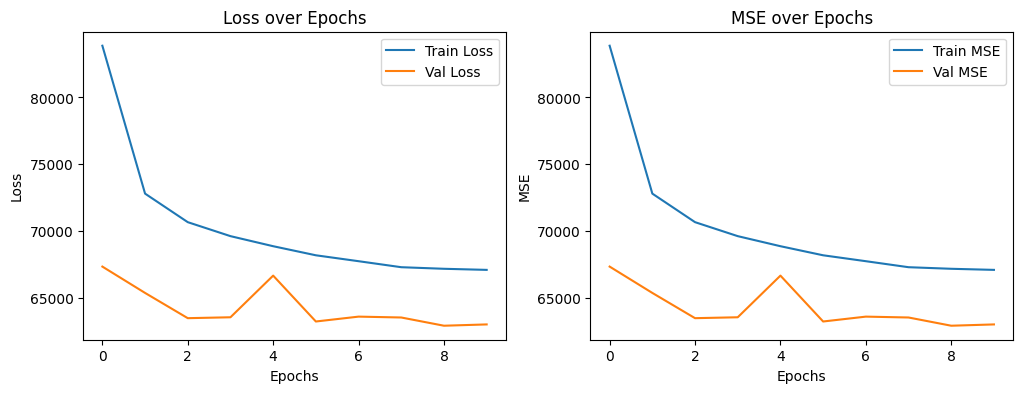

In [14]:
visualize(history)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test)))

3580/3580 ━━━━━━━━━━━━━━━━━━━━ 4s 990us/step
184.7981719970703
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 3s 950us/step
63023.85546875


SGD

In [33]:
initializer = tf.keras.initializers.GlorotNormal()

model_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, kernel_initializer=initializer),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(units=1)
])

model_regression.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss="mse")

history = model_regression.fit(
    X_regression_train, y_regression_train,
    epochs=5,
    validation_data=(X_regression_test, y_regression_test)
)

Epoch 1/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 73245.6719 - val_loss: 66666.7266
Epoch 2/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 66272.9922 - val_loss: 65925.8203
Epoch 3/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 65734.4375 - val_loss: 65462.7461
Epoch 4/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 65721.2891 - val_loss: 65113.0625
Epoch 5/5
14317/14317 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 64886.1875 - val_loss: 65383.3008


dict_keys(['loss', 'val_loss'])


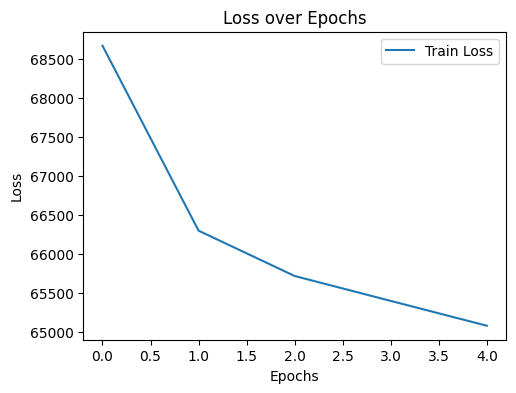

In [34]:
visualize(history)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test)))

3580/3580 ━━━━━━━━━━━━━━━━━━━━ 3s 713us/step
186.45848083496094
3580/3580 ━━━━━━━━━━━━━━━━━━━━ 3s 731us/step
65383.30859375


RMSprop 

In [ ]:
# предотвращение проблемы взрывного градиента
initializer = tf.keras.initializers.GlorotNormal()

model_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, kernel_initializer=initializer),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(units=1)
])

rms_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)

model_regression.compile(optimizer=rms_optimizer, loss='mean_squared_error')

history = model_regression.fit(X_regression_train, y_regression_train, epochs=5, verbose=0)

test_mse = model_regression.evaluate(X_regression_test, y_regression_test)
print("Test MSE:", test_mse)

3580/3580 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 65911.3594
Test MSE: 65553.546875


dict_keys(['loss'])


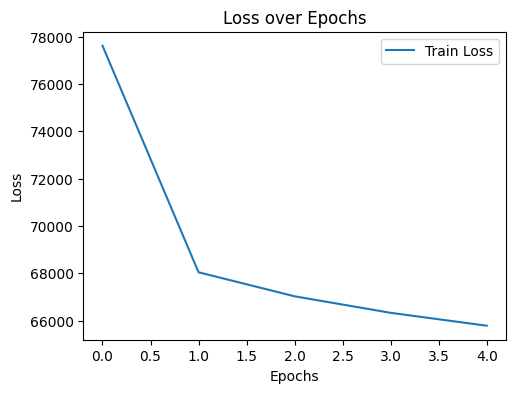

In [27]:
visualize(history)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_regression_test, model_regression.predict(X_regression_test)))
print(mean_squared_error(y_regression_test, model_regression.predict(X_regression_test)))

Подбор гиперпараметров

Optuna

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


def objective(trial):
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.0, 0.5)
    dense_1_units = trial.suggest_int("dense_1_units", 16, 128)
    dense_2_units = trial.suggest_int("dense_2_units", 8, 64)
    dense_3_units = trial.suggest_int("dense_3_units", 4, 32)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(dense_1_units, activation="relu", input_shape=(X_regression_train.shape[1],)),
        tf.keras.layers.Dense(dense_2_units, activation="linear"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(dense_3_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation="linear"),
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mse")

    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    history = model.fit(
        X_regression_train, y_regression_train,
        validation_data=(X_regression_test, y_regression_test),
        epochs=3,
        batch_size=batch_size,
        verbose=0,
        callbacks=[early_stopping],
    )

    val_mse = history.history["val_loss"][-1]
    return val_mse

In [ ]:
study = optuna.create_study(direction="minimize")

study.optimize(objective, n_trials=10)

best_params = study.best_params
best_score = study.best_value

print("Лучшие гиперпараметры:", best_params)
print("Лучшая средняя квадратичная ошибка (MSE):", best_score)

[I 2025-05-27 23:46:45,577] A new study created in memory with name: no-name-b6372bf2-1634-47e3-b8c1-374afe573dc3


C:\Users\sheld\AppData\Local\Temp\ipykernel_25696\1462322525.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
C:\Users\sheld\AppData\Local\Temp\ipykernel_25696\1462322525.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.0, 0.5)
[I 2025-05-27 23:47:42,492] Trial 0 finished with value: 69796.4140625 and parameters: {'learning_rate': 0.0033180981977697453, 'dropout_rate': 0.14340221817855636, 'dense_1_units': 78, 'dense_2_units': 32, 'dense_3_units': 24, 'batch_size': 64}. Best is trial 0 with value: 69796.4140625.
[I 2025-05-27 23:48:36,781] Trial 1 finished wi

Лучшие гиперпараметры: {'learning_rate': 0.039555169139402754, 'dropout_rate': 0.08671097481816309, 'dense_1_units': 110, 'dense_2_units': 62, 'dense_3_units': 21, 'batch_size': 64}
Лучшая средняя квадратичная ошибка (MSE): 68969.5078125


KerasTuner

In [ ]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            units=hp.Int('units_first_layer', min_value=32, max_value=128, step=32),
            activation=hp.Choice('first_activation', values=['relu', 'sigmoid']),
            input_shape=(X_regression_train.shape[1],)
        ),
        tf.keras.layers.Dense(
            units=hp.Int('units_second_layer', min_value=16, max_value=64, step=16),
            activation='linear'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(
            units=hp.Int('units_third_layer', min_value=8, max_value=32, step=8),
            activation=hp.Choice('third_activation', values=['relu', 'sigmoid'])
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']), loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=3, 
    executions_per_trial=1, 
    directory='./tuning_results',  
    project_name='regression_tuning'
)

tuner.search(x=X_regression_train, y=y_regression_train, epochs=5, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters()[0].values
print(best_hps)

Trial 3 Complete [00h 03m 43s]
val_loss: 65515.65625

Best val_loss So Far: 65515.65625
Total elapsed time: 00h 10m 05s
{'units_first_layer': 32, 'first_activation': 'sigmoid', 'units_second_layer': 64, 'dropout_rate': 0.1, 'units_third_layer': 16, 'third_activation': 'relu', 'optimizer': 'adam'}


### Классификация

Adam

In [48]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_classification_train_encoded = encoder.fit_transform(y_classification_train.values.reshape(-1, 1))

model_classification = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(3, activation='softmax')
])
model_classification.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model_classification.fit(X_classification_train, y_classification_train_encoded, epochs=5, verbose=1)

Epoch 1/5


d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15564/15564 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.5448 - loss: 0.9254
Epoch 2/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.5640 - loss: 0.9021
Epoch 3/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.5686 - loss: 0.8967
Epoch 4/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.5728 - loss: 0.8919
Epoch 5/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.5756 - loss: 0.8870


In [35]:
model_classification.predict(X_classification_test, verbose=None)[:5]

array([[0.33630493, 0.1479924 , 0.5157027 ],
       [0.2365452 , 0.31579247, 0.44766232],
       [0.08781505, 0.2409138 , 0.67127115],
       [0.97092247, 0.00430346, 0.02477407],
       [0.15864035, 0.47156677, 0.36979282]], dtype=float32)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

preds = model_classification.predict(X_classification_test, verbose=None)
y_pred = np.argmax(preds, axis=1)
print(classification_report(y_classification_test, y_pred))
print(confusion_matrix(y_classification_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64     41503
           1       0.55      0.53      0.54     41503
           2       0.54      0.57      0.55     41503

    accuracy                           0.58    124509
   macro avg       0.58      0.58      0.58    124509
weighted avg       0.58      0.58      0.58    124509

[[26317  7243  7943]
 [ 7328 22015 12160]
 [ 7001 11018 23484]]


In [38]:
model_classification.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,979 (31.17 KB)

 Trainable params: 2,659 (10.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,320 (20.79 KB)

Adam

In [39]:
model_classification.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="categorical_crossentropy", metrics=['accuracy'])

dict_keys(['accuracy', 'loss'])


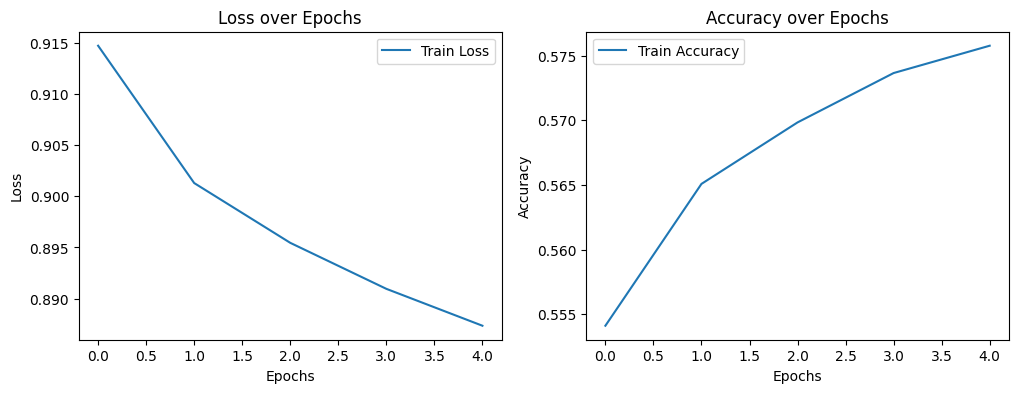

In [51]:
visualize(history)

SGD

In [61]:
initializer = tf.keras.initializers.GlorotNormal()

model_classification = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_classification.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

history = model_classification.fit(X_classification_train, y_classification_train_encoded, epochs=5, verbose=1)

Epoch 1/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.4827 - loss: 1.0071
Epoch 2/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.5415 - loss: 0.9336
Epoch 3/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.5445 - loss: 0.9287
Epoch 4/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - accuracy: 0.5462 - loss: 0.9268
Epoch 5/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.5475 - loss: 0.9240


dict_keys(['accuracy', 'loss'])


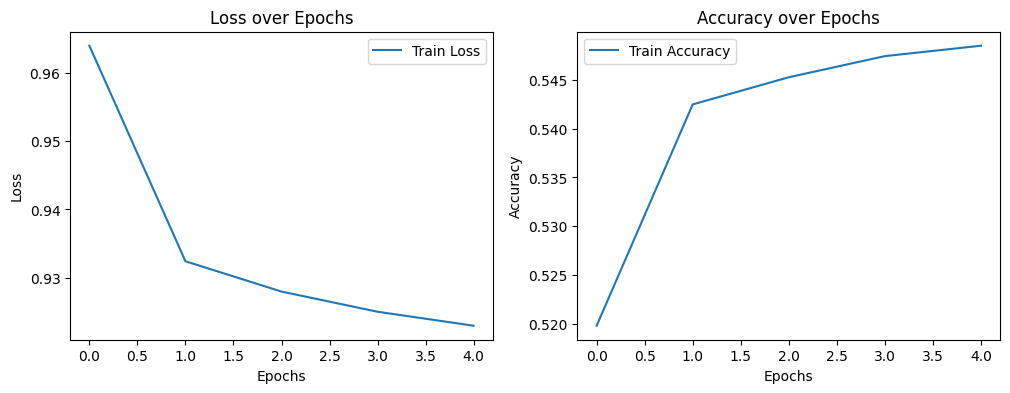

In [62]:
visualize(history)

RMSprop

In [ ]:
# предотвращение проблемы взрывного градиента
initializer = tf.keras.initializers.GlorotNormal()

model_classification = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(3, activation='softmax')
])

rms_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)

model_classification.compile(optimizer=rms_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model_classification.fit(X_classification_train, y_classification_train_encoded, epochs=5, verbose=1)

Epoch 1/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.5372 - loss: 0.9424
Epoch 2/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.5424 - loss: 0.9404
Epoch 3/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.5395 - loss: 0.9461
Epoch 4/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.5331 - loss: 0.9550
Epoch 5/5
15564/15564 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - accuracy: 0.5250 - loss: 0.9575


dict_keys(['accuracy', 'loss'])


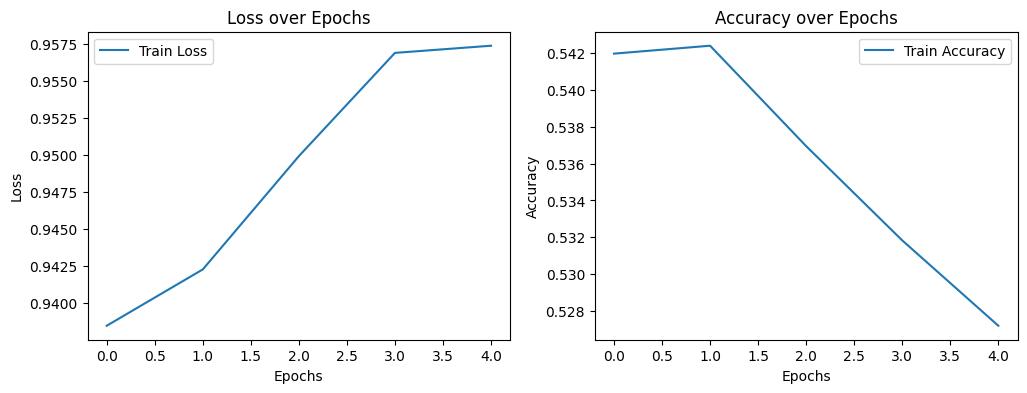

In [64]:
visualize(history)

Подбор гиперпараметров

Optuna

In [ ]:
import optuna
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_classification_train, y_classification_train_encoded, test_size=0.2, random_state=42)

def create_model(trial):
    hidden_units1 = trial.suggest_int('hidden_units1', low=32, high=256, step=32)
    hidden_units2 = trial.suggest_int('hidden_units2', low=32, high=256, step=32)
    dropout_rate = trial.suggest_float('dropout_rate', low=0.0, high=0.5, step=0.1)
    lr = trial.suggest_float('lr', low=1e-4, high=1e-2, log=True)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units1, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(hidden_units2, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(lr)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

def objective(trial):
    model = create_model(trial)
    history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-06-04 17:22:49,088] A new study created in memory with name: no-name-2ce7bde2-3053-4c3b-ba0b-42e38c1ad691
d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-06-04 17:24:01,473] Trial 0 finished with value: 0.5506540536880493 and parameters: {'hidden_units1': 128, 'hidden_units2': 64, 'dropout_rate': 0.30000000000000004, 'lr': 0.006966137972867509}. Best is trial 0 with value: 0.5506540536880493.
[I 2025-06-04 17:24:55,005] Trial 1 finished with value: 0.564488410949707 and parameters: {'hidden_units1': 224, 'hidden_units2': 160, 'dropout_rate': 0.4, 'lr': 0.0001182626081020959}. Best is trial 1 with value: 0.564488410949707.
[I 2025-06-04 17:25:39,307] Trial 2 finished wit

Best trial:
  Value:  0.5654120445251465
  Params: 
    hidden_units1: 160
    hidden_units2: 32
    dropout_rate: 0.4
    lr: 0.000777250227490474


Keras Tuner

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_first_layer', min_value=32, max_value=256, step=32), activation='relu', input_shape=(10,)))
    model.add(Dense(units=hp.Int('units_second_layer', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))
    
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    overwrite=True,
    directory='kt_dir',
    project_name='hyperparam_tune'
)

X_train, X_val, y_train, y_val = train_test_split(X_classification_train, y_classification_train_encoded, test_size=0.2, random_state=42)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

best_hps = tuner.get_best_hyperparameters()[0]
print("Best parameters found are:")
print(best_hps.values)

best_model = tuner.hypermodel.build(best_hps)

best_model.fit(X_classification_train, y_classification_train_encoded, epochs=5, validation_split=0.2, verbose=1)

score = best_model.evaluate(X_val, y_val)
print("Final test accuracy:", score[1])

Trial 3 Complete [00h 02m 42s]
val_accuracy: 0.5545293092727661

Best val_accuracy So Far: 0.5693977475166321
Total elapsed time: 00h 08m 41s
Best parameters found are:
{'units_first_layer': 96, 'units_second_layer': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0001}
Epoch 1/5
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.5313 - loss: 0.9431 - val_accuracy: 0.5561 - val_loss: 0.9125
Epoch 2/5
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.5551 - loss: 0.9151 - val_accuracy: 0.5620 - val_loss: 0.9060
Epoch 3/5
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.5607 - loss: 0.9076 - val_accuracy: 0.5660 - val_loss: 0.9010
Epoch 4/5
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 436s 35ms/step - accuracy: 0.5632 - loss: 0.9047 - val_accuracy: 0.5696 - val_loss: 0.8969
Epoch 5/5
12451/12451 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5670 - loss: 0.8993 - val_accuracy: 0.5710 - val_loss: 0.8939
3113/3113 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy:

## Scikit-Learn

### Регрессия

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

def regression_metrics(y_test, y_pred):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')

Adam

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  
    activation='relu',            
    solver='adam',              
    alpha=0.0001,             
    batch_size=32,             
    learning_rate_init=0.001,     
    max_iter=5                
)

mlp.fit(X_regression_train[:10000], y_regression_train[:10000])

y_pred = mlp.predict(X_regression_test)

regression_metrics(y_regression_test, y_pred)

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 227.32349346045714
MSE: 100107.97634763476
RMSE: 316.39844555186227
MAPE: 0.6157635602206429


SGD

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',           
    solver='sgd',                
    alpha=0.01,                 
    batch_size=32,               
    learning_rate_init=0.001,     
    max_iter=5               
)

mlp.fit(X_regression_train[:10000], y_regression_train[:10000])

y_pred = mlp.predict(X_regression_test)

regression_metrics(y_regression_test, y_pred)

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 419.1487593203765
MSE: 293380.0174096775
RMSE: 541.6456566886487
MAPE: 0.8658044635646249


lbfgs

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32), 
    activation='relu',            
    solver='lbfgs',                
    alpha=0.01,                 
    batch_size=32,                
    learning_rate_init=0.001,    
    max_iter=5                 
)

mlp.fit(X_regression_train[:10000], y_regression_train[:10000])

y_pred = mlp.predict(X_regression_test)

regression_metrics(y_regression_test, y_pred)

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE: 263.74625002182756
MSE: 129176.46369636964
RMSE: 359.41127374690075
MAPE: 0.694479986258447


Подбор гиперпараметров

Optuna

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'hidden_layer_sizes': tuple(trial.suggest_int('layer_{}'.format(i), 16, 128) for i in range(2)),
        'activation': trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu']),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam']),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-1),
        'batch_size': trial.suggest_int('batch_size', 16, 128),
        'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1),
        'max_iter': trial.suggest_int('max_iter', 3, 10)
    }

    mlp = MLPClassifier(**params)
    mlp.fit(X_regression_train[:10000], y_regression_train[:10000])
    y_pred = mlp.predict(X_regression_test)
    mse = mean_squared_error(y_regression_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Лучшие гиперпараметры:", study.best_params)
print("Минимальное MSE:", study.best_value)

[I 2025-06-04 18:06:20,363] A new study created in memory with name: no-name-49cc8c1a-dd56-49dd-96b5-570f17a57e3e
C:\Users\sheld\AppData\Local\Temp\ipykernel_13896\3005679179.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-1),
C:\Users\sheld\AppData\Local\Temp\ipykernel_13896\3005679179.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1),
d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the o

Лучшие гиперпараметры: {'layer_0': 63, 'layer_1': 108, 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.01849731999017316, 'batch_size': 16, 'learning_rate_init': 0.048236706230225634, 'max_iter': 8}
Минимальное MSE: 90546.00943824541


RandomizedSearchCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_distributions = {
    'hidden_layer_sizes': [(x, y) for x in randint(low=16, high=128).rvs(size=10) for y in randint(low=16, high=128).rvs(size=10)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': uniform(loc=1e-5, scale=1e-1).rvs(size=10),
    'batch_size': randint(low=16, high=128).rvs(size=10),
    'learning_rate_init': uniform(loc=1e-5, scale=1e-1).rvs(size=10),
    'max_iter': randint(low=3, high=10).rvs(size=10)
}

random_search = RandomizedSearchCV(MLPClassifier(), param_distributions, cv=3, scoring='neg_mean_squared_error', n_iter=3, random_state=42)
random_search.fit(X_regression_train[:10000], y_regression_train[:10000])

print("Лучшие гиперпараметры:", random_search.best_params_)
print("Минимальное MSE:", abs(random_search.best_score_))

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\PythonWork\OldZmiy\ElfPythonProje

Лучшие гиперпараметры: {'solver': 'sgd', 'max_iter': np.int64(3), 'learning_rate_init': np.float64(0.0697646629250699), 'hidden_layer_sizes': (np.int64(51), np.int64(19)), 'batch_size': np.int64(21), 'alpha': np.float64(0.02530368996666803), 'activation': 'tanh'}
Минимальное MSE: 102214.26017268794


d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Hyperopt

In [10]:
from hyperopt import fmin, hp, tpe, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

space = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(x, y) for x in range(16, 128) for y in range(16, 128)]),
    'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
    'solver': hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
    'alpha': hp.loguniform('alpha', -5, -1),
    'learning_rate_init': hp.loguniform('learning_rate_init', -5, -1),
    'max_iter': hp.randint('max_iter', 3, 10)
}

def objective(params):
    mlp = MLPClassifier(**params)
    mlp.fit(X_regression_train[:5000], y_regression_train[:5000])
    y_pred = mlp.predict(X_regression_test)
    mse = mean_squared_error(y_regression_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5, trials=trials)

print("Лучшие гиперпараметры:", best)
print("Минимальное MSE:", trials.best_trial['result']['loss'])

  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(



 20%|██        | 1/5 [00:18<01:13, 18.33s/trial, best loss: 109138.39903434788]

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(



 40%|████      | 2/5 [00:28<00:40, 13.38s/trial, best loss: 109138.39903434788]

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 60%|██████    | 3/5 [00:38<00:24, 12.16s/trial, best loss: 109138.39903434788]

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(



 80%|████████  | 4/5 [00:52<00:12, 12.60s/trial, best loss: 103684.18651230203]

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



100%|██████████| 5/5 [01:03<00:00, 12.61s/trial, best loss: 103684.18651230203]
Лучшие гиперпараметры: {'activation': np.int64(1), 'alpha': np.float64(0.03228348163486279), 'hidden_layer_sizes': np.int64(6194), 'learning_rate_init': np.float64(0.02257431313098032), 'max_iter': np.int64(9), 'solver': np.int64(2)}
Минимальное MSE: 103684.18651230203


### Классификация

Adam

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  
    activation='relu',            
    solver='adam',              
    alpha=0.0001,             
    batch_size=32,             
    learning_rate_init=0.001,     
    max_iter=100           
)

mlp.fit(X_classification_train[:10000], y_classification_train[:10000])

y_pred = mlp.predict(X_classification_test)

print(classification_report(y_classification_test, y_pred))

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.59      0.64      0.62     41503
           1       0.53      0.45      0.48     41503
           2       0.51      0.54      0.52     41503

    accuracy                           0.54    124509
   macro avg       0.54      0.54      0.54    124509
weighted avg       0.54      0.54      0.54    124509



SGD

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  
    activation='relu',            
    solver='sgd',              
    alpha=0.0001,             
    batch_size=32,             
    learning_rate_init=0.001,     
    max_iter=100       
)

mlp.fit(X_classification_train[:10000], y_classification_train[:10000])

y_pred = mlp.predict(X_classification_test)

print(classification_report(y_classification_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62     41503
           1       0.51      0.50      0.51     41503
           2       0.52      0.53      0.53     41503

    accuracy                           0.55    124509
   macro avg       0.55      0.55      0.55    124509
weighted avg       0.55      0.55      0.55    124509



d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


lbfgs

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  
    activation='relu',            
    solver='lbfgs',              
    alpha=0.0001,             
    batch_size=32,             
    learning_rate_init=0.001,     
    max_iter=100     
)

mlp.fit(X_classification_train[:10000], y_classification_train[:10000])

y_pred = mlp.predict(X_classification_test)

print(classification_report(y_classification_test, y_pred))

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       0.63      0.60      0.61     41503
           1       0.51      0.50      0.50     41503
           2       0.51      0.53      0.52     41503

    accuracy                           0.55    124509
   macro avg       0.55      0.55      0.55    124509
weighted avg       0.55      0.55      0.55    124509



Подбор гиперпараметров

Optuna

In [23]:
import optuna
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'hidden_layer_sizes': tuple(trial.suggest_int('layer_{}'.format(i), 16, 128) for i in range(2)),  # Два слоя
        'activation': trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu']),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam']),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-1),
        'batch_size': trial.suggest_int('batch_size', 16, 128),
        'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1),
        'max_iter': trial.suggest_int('max_iter', 3, 10)
    }

    mlp = MLPClassifier(**params)
    mlp.fit(X_classification_train, y_classification_train)
    y_pred = mlp.predict(X_classification_test)
    ac = accuracy_score(y_classification_test, y_pred)
    return ac

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

print("Лучшие гиперпараметры:", study.best_params)
print("Наилучший accuracy:", study.best_value)

[I 2025-06-04 18:42:06,864] A new study created in memory with name: no-name-bb8b472d-cdb8-4c87-9468-a0f81c427a12
C:\Users\sheld\AppData\Local\Temp\ipykernel_20028\3572593922.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-1),
C:\Users\sheld\AppData\Local\Temp\ipykernel_20028\3572593922.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1),
d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the o

Лучшие гиперпараметры: {'layer_0': 74, 'layer_1': 79, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0012983196432422362, 'batch_size': 117, 'learning_rate_init': 0.0036037957029533725, 'max_iter': 8}
Наилучший accuracy: 0.6030889333301207


RandomizedSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_distributions = {
    'hidden_layer_sizes': [(x, y) for x in randint(low=16, high=128).rvs(size=10) for y in randint(low=16, high=128).rvs(size=10)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': uniform(loc=1e-5, scale=1e-1).rvs(size=10),
    'batch_size': randint(low=16, high=128).rvs(size=10),
    'learning_rate_init': uniform(loc=1e-5, scale=1e-1).rvs(size=10),
    'max_iter': randint(low=3, high=10).rvs(size=10)
}

random_search = RandomizedSearchCV(MLPClassifier(), param_distributions, cv=3, scoring='accuracy', n_iter=3, random_state=42)
random_search.fit(X_classification_train[:50000], y_classification_train[:50000])

print("Лучшие гиперпараметры:", random_search.best_params_)
print("Наилучший accuracy:", abs(random_search.best_score_))

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Лучшие гиперпараметры: {'solver': 'sgd', 'max_iter': np.int64(6), 'learning_rate_init': np.float64(0.09920493454625286), 'hidden_layer_sizes': (np.int64(89), np.int64(51)), 'batch_size': np.int64(37), 'alpha': np.float64(0.08025342137127665), 'activation': 'tanh'}
Наилучший accuracy: 0.5321199816253285


d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


HyperOpt

In [31]:
from hyperopt import fmin, hp, tpe, STATUS_OK, Trials
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

space = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(x, y) for x in range(16, 128) for y in range(16, 128)]),
    'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
    'solver': hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
    'alpha': hp.loguniform('alpha', -5, -1),
    'learning_rate_init': hp.loguniform('learning_rate_init', -5, -1),
    'max_iter': hp.randint('max_iter', 3, 10)
}

def objective(params):
    mlp = MLPClassifier(**params)
    mlp.fit(X_classification_train[:100000], y_classification_train[:100000])
    y_pred = mlp.predict(X_classification_test)
    ac = accuracy_score(y_classification_test, y_pred)
    return {'loss': 1 - ac, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5, trials=trials)

print("Лучшие гиперпараметры:", best)
print("Наилучший accuracy:", trials.best_trial['result']['loss'])

 20%|██        | 1/5 [00:03<00:13,  3.33s/trial, best loss: 0.4655165490044897]

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(



 40%|████      | 2/5 [00:10<00:17,  5.78s/trial, best loss: 0.4655165490044897]

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 60%|██████    | 3/5 [00:15<00:10,  5.40s/trial, best loss: 0.4655165490044897]

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 80%|████████  | 4/5 [00:21<00:05,  5.40s/trial, best loss: 0.46415921740597066]

d:\PythonWork\OldZmiy\ElfPythonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(



100%|██████████| 5/5 [00:25<00:00,  5.11s/trial, best loss: 0.45147740323992647]
Лучшие гиперпараметры: {'activation': np.int64(2), 'alpha': np.float64(0.1285083214101886), 'hidden_layer_sizes': np.int64(5792), 'learning_rate_init': np.float64(0.010448568985234562), 'max_iter': np.int64(3), 'solver': np.int64(2)}
Наилучший accuracy: 0.45147740323992647


## Собственная реализация MLP

In [11]:
from my_mlp import *

input_size = 2
hidden_size_1 = 4
output_size = 1

layers = [
    AffineLayer(input_size, hidden_size_1),
    ReluActivation(),
    AffineLayer(hidden_size_1, output_size),
    SigmoidActivation()
]

network = FeedForwardNetwork(layers)
optimizer = SGDOptimizer(learning_rate=0.01)

# Обучение сети
network.fit(X_regression_train, y_regression_train, epochs=5, batch_size=4, optimizer=optimizer)

# Предсказание результата
predictions = network.predict(X_regression_test)
print("Predictions:", predictions.flatten())

ValueError: shapes (4,6) and (2,4) not aligned: 6 (dim 1) != 2 (dim 0)